In [ ]:
%pip install numpy matplotlib -q

https://www.youtube.com/watch?v=sjlPGj0sHAo

Quintic polynomial trajectories are widely employed in robotics and motion planning to ensure smooth transitions between waypoints while maintaining continuous velocity and acceleration profiles. These trajectories inherently minimize jerk, thereby reducing dynamic stress on actuators and mechanical components.

It is important to note that torque is directly proportional to angular acceleration; consequently, the selection of an appropriate trajectory duration is critical. Excessively short time intervals can result in unrealistically high acceleration and torque demands, which may surpass the physical limits of actuators or lead to instability in real-world robotic systems.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class QuinticTrajectory:
    """Class for generating and visualizing quintic polynomial trajectories."""

    def __init__(self, t0: float, tf: float,
                 q0: float, dq0: float, ddq0: float,
                 qf: float, dqf: float, ddqf: float):
        """
        Initialize boundary conditions and solve for coefficients.

        Args:
            t0, tf : float
                Start and end time.
            q0, dq0, ddq0 : float
                Initial position, velocity, acceleration.
            qf, dqf, ddqf : float
                Final position, velocity, acceleration.
        """
        self.t0, self.tf = t0, tf
        self.q0, self.dq0, self.ddq0 = q0, dq0, ddq0
        self.qf, self.dqf, self.ddqf = qf, dqf, ddqf

        # Compute polynomial coefficients
        self.C = self._compute_coefficients()

    # --------------------------
    # Internal methods
    # --------------------------
    def _quintic_T_matrix(self) -> np.ndarray:
        """Return 6x6 boundary condition matrix."""
        t0, tf = self.t0, self.tf
        return np.array([
            [1, t0, t0**2, t0**3, t0**4, t0**5],
            [0, 1, 2*t0, 3*t0**2, 4*t0**3, 5*t0**4],
            [0, 0, 2, 6*t0, 12*t0**2, 20*t0**3],
            [1, tf, tf**2, tf**3, tf**4, tf**5],
            [0, 1, 2*tf, 3*tf**2, 4*tf**3, 5*tf**4],
            [0, 0, 2, 6*tf, 12*tf**2, 20*tf**3]
        ], dtype=float)

    def _compute_coefficients(self) -> np.ndarray:
        """Solve for coefficients given boundary conditions."""
        T = self._quintic_T_matrix()
        rhs = np.array([self.q0, self.dq0, self.ddq0,
                        self.qf, self.dqf, self.ddqf], dtype=float)
        return np.linalg.solve(T, rhs)

    # --------------------------
    # Evaluation
    # --------------------------
    def evaluate(self, t: np.ndarray):
        """
        Evaluate the trajectory and its derivatives at times t.

        Returns:
            q_t, dq_t, ddq_t (arrays): position, velocity, acceleration.
        """
        t = np.asarray(t, dtype=float)
        C = self.C
        q_t = np.zeros_like(t)
        dq_t = np.zeros_like(t)
        ddq_t = np.zeros_like(t)
        for i in range(6):
            q_t += C[i] * (t ** i)
            if i >= 1:
                dq_t += i * C[i] * (t ** (i - 1))
            if i >= 2:
                ddq_t += i * (i - 1) * C[i] * (t ** (i - 2))
        return q_t, dq_t, ddq_t

    # --------------------------
    # Visualization
    # --------------------------
    def plot(self, num_points: int = 200):
        """Plot position, velocity, and acceleration over time."""
        t = np.linspace(self.t0, self.tf, num_points)
        q_t, dq_t, ddq_t = self.evaluate(t)

        plt.figure(figsize=(9, 6))
        plt.plot(t, q_t, label="q(t): position", linewidth=2)
        plt.plot(t, dq_t, label="dq(t): velocity", linestyle="--")
        plt.plot(t, ddq_t, label="ddq(t): acceleration", linestyle=":")
        plt.title("Quintic Polynomial Trajectory")
        plt.xlabel("Time (s)")
        plt.ylabel("Value")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

Coefficients C:
[ 1.04719755e+00 -1.06581410e-15 -3.55271368e-16  3.56047167e-01
 -1.06814150e-01  8.54513202e-03]


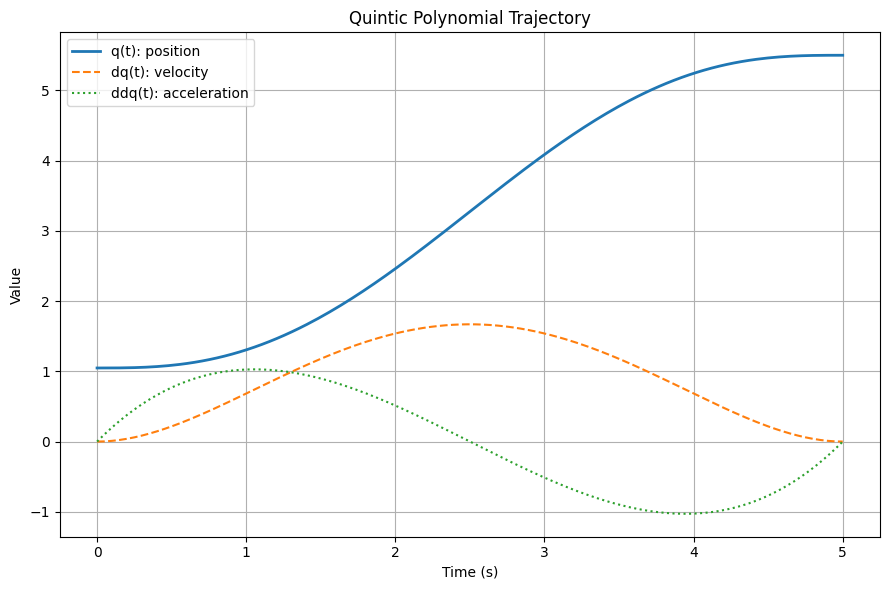

In [ ]:
# Define boundary conditions
traj = QuinticTrajectory(
    t0=0.0, tf=5.0,
    q0=np.pi/3, dq0=0.0, ddq0=0.0,
    qf=7*np.pi/4, dqf=0.0, ddqf=0.0
)

print("Coefficients C:")
print(traj.C)

# Plot position, velocity, acceleration
traj.plot()


Coefficients C:
[  1.04719755   0.           0.          44.50589593 -66.75884389
  26.70353756]


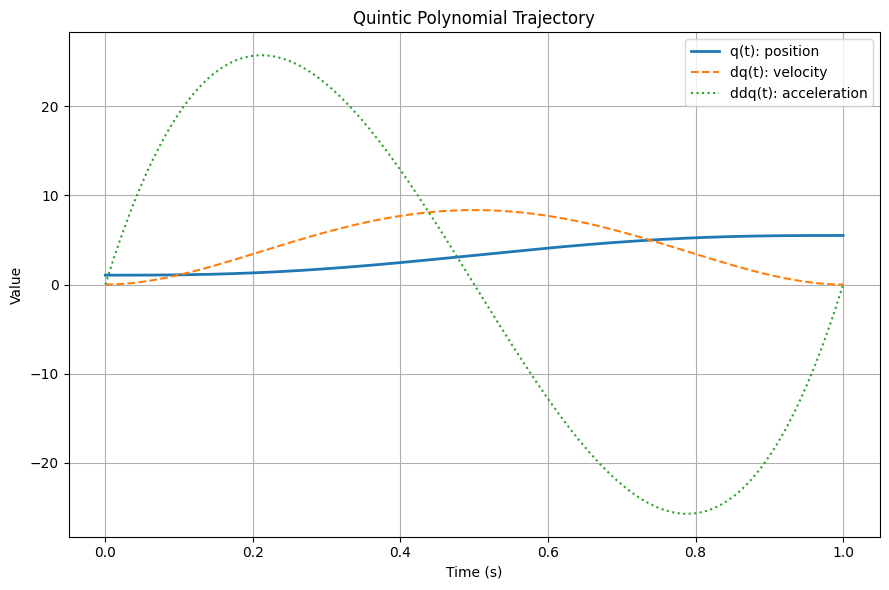

In [ ]:
# Define boundary conditions
traj = QuinticTrajectory(
    t0=0.0, tf=1.0,
    q0=np.pi/3, dq0=0.0, ddq0=0.0,
    qf=7*np.pi/4, dqf=0.0, ddqf=0.0
)

print("Coefficients C:")
print(traj.C)

# Plot position, velocity, acceleration
traj.plot()
